# 2.2.1 Preparing E-COMMERCE Platform Data

# step 1 import library yang dibutuhkan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# step 2 membaca dataset

In [8]:
electronics_data=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])

# step 3 membaca data 5 baris pertama 

In [9]:
electronics_data.head(5)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


# step 4 membaca size data

In [10]:
electronics_data.shape

(7824482, 4)

# step 5 melihat tipe data dari isi header table

In [11]:
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

# melihat informasi mengenai dataset secara keseluruhan

In [12]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


# menghapus informasi tertentu dari info()

In [13]:
electronics_data.info(memory_usage =False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)

# step 6 melihat rating dari user menggunakan describe()

In [14]:
electronics_data.describe()['Rating']

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

# melihat nilai rating tertinggi dan terendah menggunakan min() dan max()

In [15]:
print('Minimum rating is: %d' %(electronics_data.Rating.min())) 
print('Maximum rating is: %d' %(electronics_data.Rating.max())) 

Minimum rating is: 1
Maximum rating is: 5


# step 7 melakukan pengecekan apakah ada data yang nilainya null menggunakan isnull() dan sum()

In [16]:
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


# step 8 melihat jumlah produk dan user dengan menggunakan unique() 

In [17]:
print("Total data ") 
print("-"*50) 
print("\nTotal no of ratings :",electronics_data.shape[0]) 
print("Total No of Users :", len(np.unique(electronics_data.userId))) 
print("Total No of products :", len(np.unique(electronics_data.productId))) 

Total data 
--------------------------------------------------

Total no of ratings : 7824482
Total No of Users : 4201696
Total No of products : 476002


# step 9 menghapus informasi dari tabel yang tidak diperlukan yaitu timestamp dengan drop()

In [18]:
electronics_data.drop(['timestamp'], axis=1,inplace=True) 
electronics_data.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# step 10 menganalisa rating data dengan menggunakan groupby(), sort_values() dan ascending()

In [19]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False) 
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [20]:
no_of_rated_products_per_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

# melihat quantile dari data menggunakan quantile()

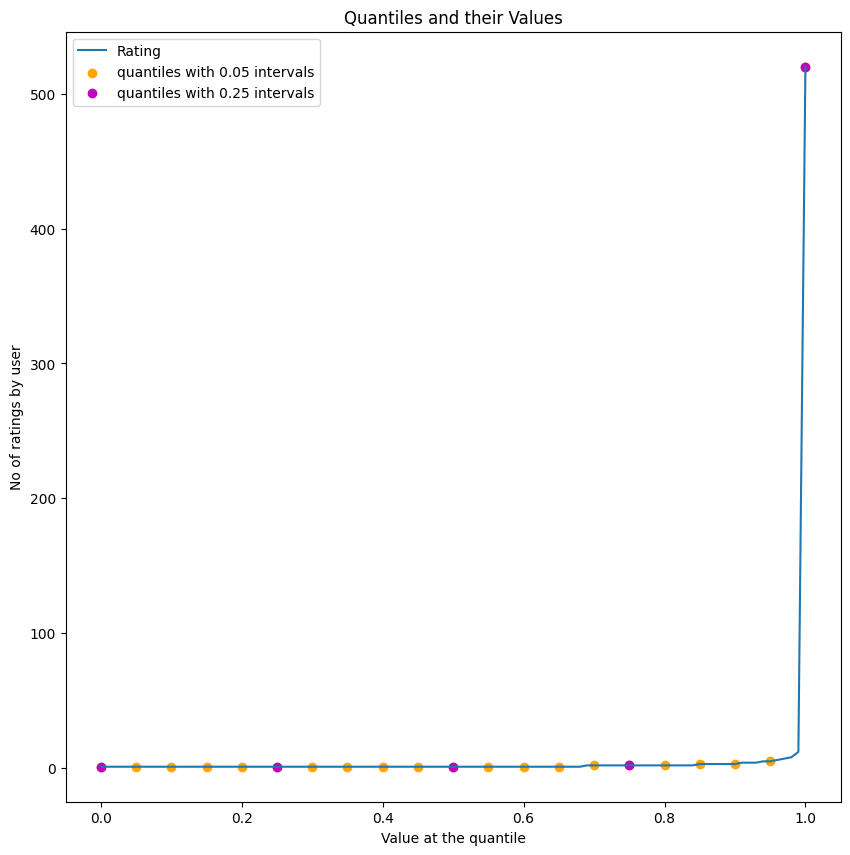

In [21]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher') 
plt.figure(figsize=(10,10)) 
plt.title("Quantiles and their Values") 
quantiles.plot() 
# quantiles with 0.05 difference 
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals") 
# quantiles with 0.25 difference 
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user') 
plt.xlabel('Value at the quantile') 
plt.legend(loc='best') 
plt.show()

In [22]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 1540



# 2.2.2 Recommending Products Based On the Product Popularity

# step 1 menyortir produk

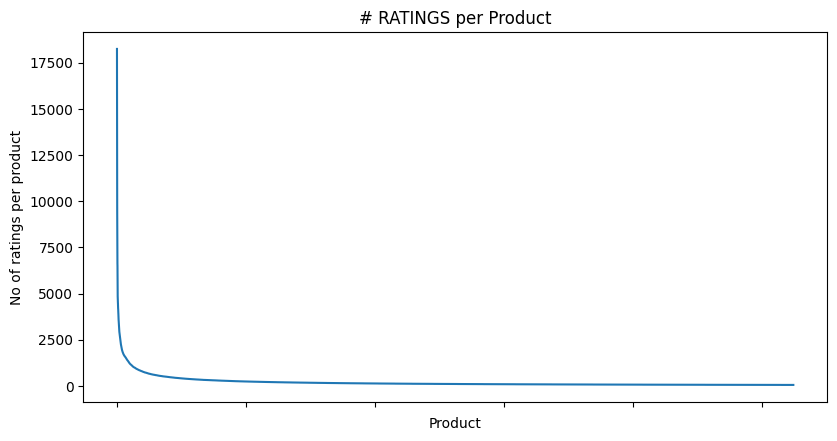

In [23]:
new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50) 
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False) 
fig = plt.figure(figsize=plt.figaspect(.5)) 
ax = plt.gca() 
plt.plot(no_of_ratings_per_product.values) 
plt.title('# RATINGS per Product') 
plt.xlabel('Product') 
plt.ylabel('No of ratings per product') 
ax.set_xticklabels([]) 
plt.show()

In [24]:
# Calculate the average rating of each product. 
new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

# step 2 menyortir produk berdasarkan rating rata rata 

In [53]:
# Calculate the average rating of each product. 
new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [25]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

In [26]:
# Obtain the rankings of the products sorted by the number of rating times. 
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [27]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean()) 
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count()) 
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [28]:
ratings_mean_count['rating_counts'].max()# View the maximum number of rating times.

18244

# step 3 memvisualisasikan hasilnya

<Axes: >

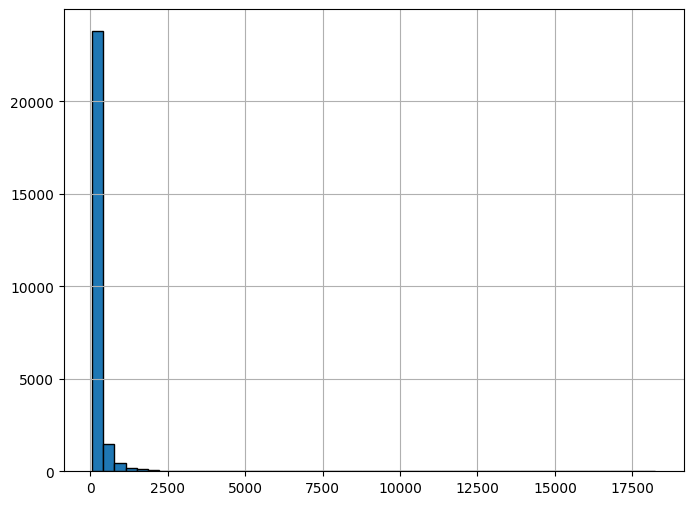

In [29]:
plt.figure(figsize=(8,6))# Set the image size. 
plt.rcParams['patch.force_edgecolor'] = True 
ratings_mean_count['rating_counts'].hist(bins=50)

<Axes: >

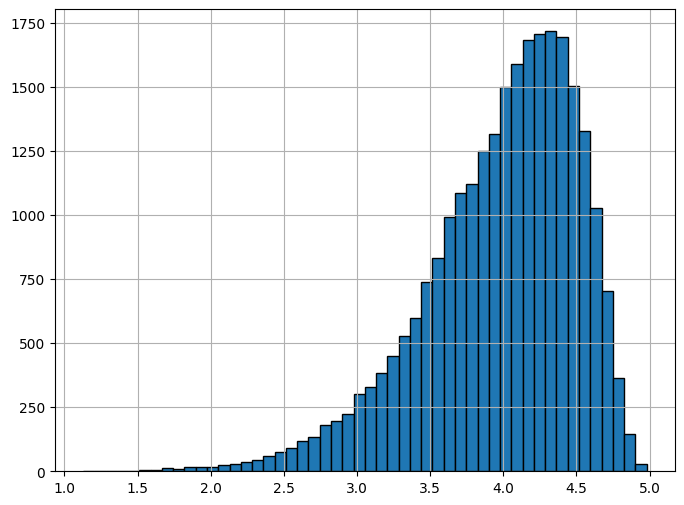

In [50]:
plt.figure(figsize=(8,6)) 
plt.rcParams['patch.force_edgecolor'] = True 
ratings_mean_count['Rating'].hist(bins=50)

/home/f4dh/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/f4dh/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/f4dh/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/f4dh/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 800x600 with 0 Axes>

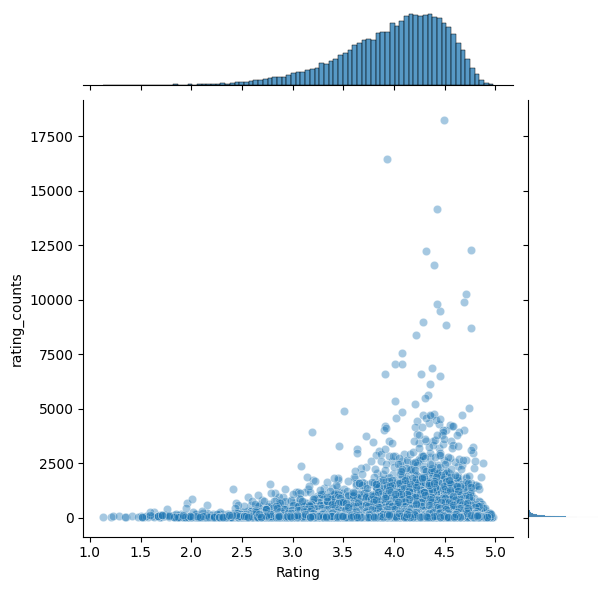

In [31]:
plt.figure(figsize=(8,6)) 
plt.rcParams['patch.force_edgecolor'] = True 
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<Axes: xlabel='productId'>

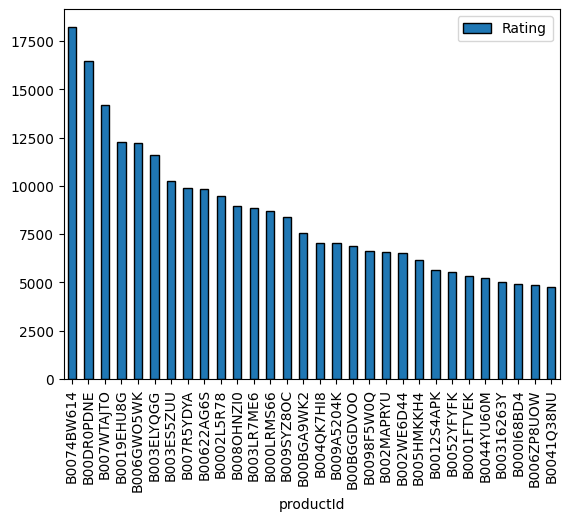

In [32]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count()) 
most_popular = popular_products.sort_values('Rating', ascending=False) 
most_popular.head(30).plot(kind = "bar")

# 2.2.3 Recommending Products Based on Collaborative Filtering

# step 1 membuat tabel hubungan antara produk dan user 

In [52]:
new_df1=new_df.head(10000) 
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0) 
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0571176384K8RBNKGF8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ratings_matrix.shape

(9832, 76)

# menukar antara userId dan productId

In [35]:
X = ratings_matrix.T 
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X.shape# View the data size.

(76, 9832)

# step 2 mendekompos tabel menggunakan algoritma SVC dari library klearn

In [37]:
from sklearn.decomposition import TruncatedSVD # Import the SVD algorithm. 
SVD = TruncatedSVD(n_components=10)# Construct an SVD model to combine the number of features (that is, the number of columns) into 10 important combined features. 
decomposed_matrix = SVD.fit_transform(X)# Transform the table. 
decomposed_matrix.shape# View the size of the table after conversion.

(76, 10)

# step 3 mencari kesamaan/similarities dari produk menggunakan corrcoef()

In [38]:
correlation_matrix = np.corrcoef(decomposed_matrix) 
correlation_matrix.shape

(76, 76)

# step 4 merekomendasikan produk berdasarkan kesaaman produk

In [39]:
X.index[20]# Select the 20th product.

'9984984354'

In [40]:
# Determine whether the product is unique. 
i = "9984984354" 
product_names = list(X.index) 
product_ID = product_names.index(i) 
product_ID

20

# melihat jumlah produk yang memiliki kesamaan dengan produk

In [41]:
# View the number of similar products in the similarity table. 
correlation_product_ID = correlation_matrix[product_ID] 
correlation_product_ID.shape

(76,)

# melihat produk yang memiliki koefisien korelasi dengan produk yang kita masukkan dengan koefisien korelasi lebih dari 0.65

In [42]:
#Select products whose coefficient of correlation with the 20th product is greater than 0.65. 
Recommend = list(X.index[correlation_product_ID > 0.65]) 
# Delete the 20th product. 
Recommend.remove(i) 
Recommend[0:10]# Recommend products ranked ahead to the users who like the 20th product.

['9625993428',
 'B000001OM5',
 'B00000J08Q',
 'B00000J0D5',
 'B00000J1EJ',
 'B00000J1EP',
 'B00000J1EQ',
 'B00000J1F3',
 'B00000J1SC',
 'B00000J1TX']